In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_df=pd.read_csv('https://raw.githubusercontent.com/IT24102955/AI-ML-Project/refs/heads/main/data/raw/IT24102955.csv')

##Outlier Removal

In [5]:
# selecting numerical features
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: \n{numerical_features}")

Numerical features: 
['CHILDREN', 'Annual_income', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members']


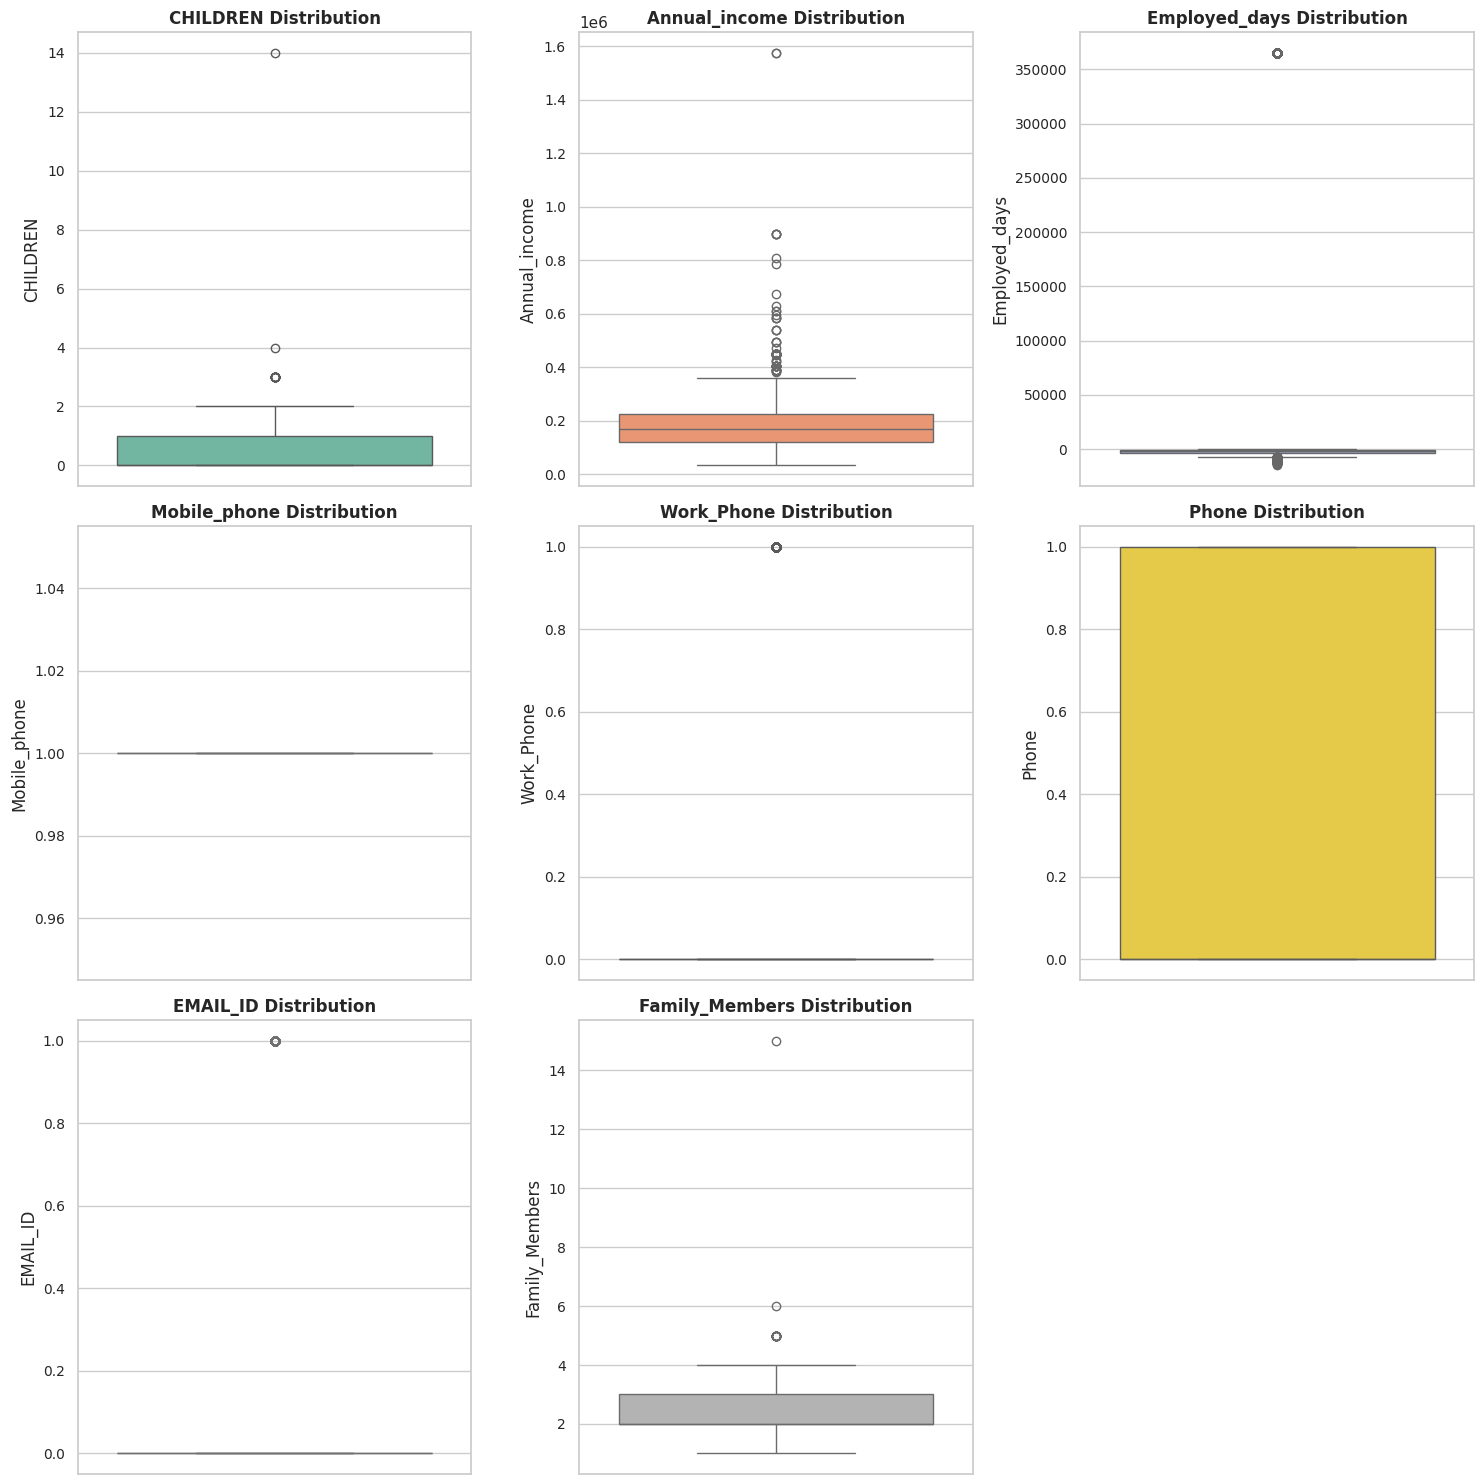

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid", palette="pastel")

n = len(numerical_features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))


axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(y=data_df[col], ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f"{col} Distribution", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='y', labelsize=10)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
# identifying the outliers in the annual_income
Q1 = data_df['Annual_income'].quantile(0.25)
Q3 = data_df['Annual_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_df[(data_df['Annual_income'] < lower_bound) | (data_df['Annual_income'] > upper_bound)]

print(f"Number of outliers in 'Annual_income': {len(outliers)}")

Number of outliers in 'Annual_income': 71


In [8]:
# Calculate the absolute difference from the median to identify the most extreme outliers
data_df['Annual_income_abs_diff'] = abs(data_df['Annual_income'] - data_df['Annual_income'].median())

# Sort the DataFrame by this absolute difference in descending order
data_df_sorted = data_df.sort_values(by='Annual_income_abs_diff', ascending=False)

# Identify the indices of the top 20 outliers
outlier_indices = data_df_sorted.head(20).index

# Drop these rows from the original DataFrame
data_df.drop(outlier_indices, inplace=True)

# Drop the temporary absolute difference column
data_df.drop('Annual_income_abs_diff', axis=1, inplace=True)

print(f"Shape of the DataFrame after removing 20 most extreme outliers: {data_df.shape}")

Shape of the DataFrame after removing 20 most extreme outliers: (1521, 16)


Here features like mobile_phone,Work_Phone,Phone,EMAIL_ID are not useful for our prediction model so in the feature engineering step we're are going to drop those columns. while annual income column contains some outliers we're going to remove only the outermost 20 outliers reason for this if we remove all the outliers from the annual income column our dataset going to be even smaller and another reason is machine learning algorithms dont represent each feature alone in higher dimensional space, they represent the combined features in a higher dimensional space so even if a data pont is an outlier if it combine with other features it can be a meaninful.

In [9]:
data_df.to_csv('IT24104218.csv',index=False)